# PyTorch，线性回归，梯度下降法，GPU

In [9]:
%matplotlib inline

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

# 数据生成

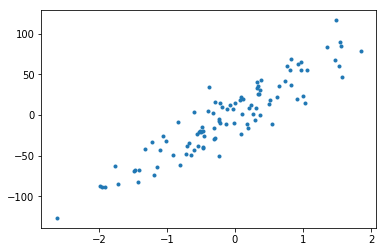

In [12]:
from sklearn.datasets import make_regression


n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=20,
    random_state=42,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

# 求解过程

In [13]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()
X.size(), y.size()

(torch.Size([100, 1]), torch.Size([100, 1]))

In [14]:
class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        #回归系数
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

In [15]:
model = LinReg(n_features).to(DEVICE)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

X, y = X.to(DEVICE), y.to(DEVICE)

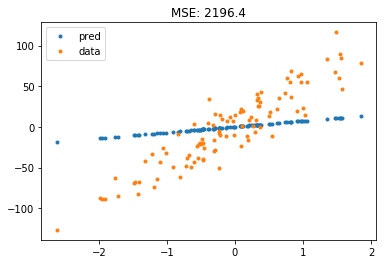

In [16]:
# 训练
model.train()#训练模式
optimizer.zero_grad()#梯度清零，why？

y_ = model(X)
loss = loss_fn(y_, y)

#更新回归系数，一步迭代
loss.backward()
optimizer.step()

# 推理阶段
model.eval()
with torch.no_grad():
    y_ = model(X)

# 可视化结果
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

# Exercise:
- 写一个循环，迭代50步参数
- 切分训练集/验证集
- 使用Dataset和DataLoader
- 类似的，创建一个分类（二类）问题数据集，使用逻辑回归并求解

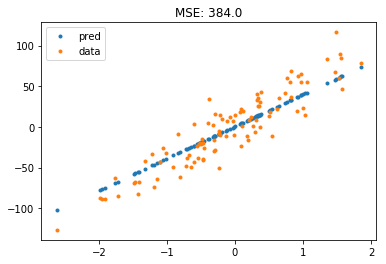

In [25]:
NUM_ITER = 10

#定义模型
model = LinReg(n_features).to(DEVICE)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

X, y = X.to(DEVICE), y.to(DEVICE)

# 训练
model.train()#训练模式
optimizer.zero_grad()#梯度清零

for _ in range(NUM_ITER):
    y_ = model(X)
    loss = loss_fn(y_, y)

    #更新回归系数，一步迭代
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()#梯度清零

# 推理阶段
model.eval()
with torch.no_grad():
    y_ = model(X)

# 可视化结果
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();